# CONJUNTOS DISJUNTOS

<img src="conjuntosDisjuntos.jpg">

In [1]:
import graphviz as gv

# Dibujamos el Grafo
def dibujarUFDS(lista):
    dot = gv.Digraph(comment='Nada')
    n = len(lista)
    
    for i in range(n): #Creamos Nodos a partir de los elementos de una Lista
        dot.node(str(i), str(i))
        
    for i in range(n): #Creamos Aristas
        if i != lista[i]: # Evitamos dibujar aristas al mismo nodo: lazo
            dot.edge(str(i), str(lista[i]))
            
    dot.graph_attr['rankdir'] = 'BT'  #Dibuja el Grafo, como una estructura "Binary Tree"(BT), con una "Raiz"
    return dot

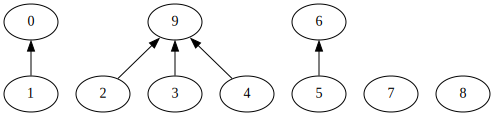

In [2]:
lista = [0, 0, 9, 9, 9, 6, 6, 7, 8, 9] # Padres de los indices

dot = dibujarUFDS(lista) 
dot

### QUICK FIND

In [5]:
#Obtenemos el subconjunto del elemento
def quickfind(lista, i): 
    return lista[i]

#Se une en un solo subconjunto, si pertenecen a subconjuntos diferentes
def qf_union(lista, a, b):
    subconjunto_a = quickfind(lista, a)
    subconjunto_b = quickfind(lista, b)
    
    for i in range(len(lista)):
        if lista[i] == subconjunto_a:       # los elementos que pertenecen al mismo subconjunto que a
            lista[i] = subconjunto_b        # se unen al subconjunto de b

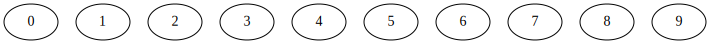

In [11]:
lista = [i for i in range(10)] #Generamos una lista de 10 enteros
dot = dibujarUFDS(lista)
#gv.Source(dot)
dot

Lista actualizada: 
Elemento 	Subconjunto 
    0 		     0
    1 		     1
    2 		     1
    3 		     4
    4 		     4
    5 		     6
    6 		     6
    7 		     7
    8 		     8
    9 		     9


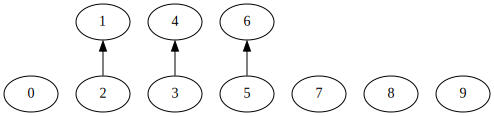

In [12]:
qf_union(lista, 3, 4)       # el padre de 3 es 4
qf_union(lista, 5, 6)
qf_union(lista, 2, 1)

print("Lista actualizada: ")  
print("Elemento \tSubconjunto ")
for elemento in range(len(lista)):
    print(f"    {elemento} \t\t     {lista[elemento]}")

dot = dibujarUFDS(lista)
dot

### QUICK UNION

In [13]:
#Obtenemos la raiz del elemento
def qu_find(lista, i):
    while lista[i] != i:        # mientras el padre de i no sea el mismo nodo i
        i = lista[i]            # permite recorrer como un arbol, hasta llegar a la raiz de i
    return i

#Definimos la funcion union
def qu_union(lista, a, b):
    raiz_a = qu_find(lista, a)
    raiz_b = qu_find(lista, b)
    lista[raiz_a] = raiz_b      # Colocamos como Raiz de ambos a raiz de "b"

Lista actualizada: 
Elemento 	Subconjunto 
    0 		     0
    1 		     1
    2 		     9
    3 		     4
    4 		     9
    5 		     6
    6 		     9
    7 		     7
    8 		     8
    9 		     9


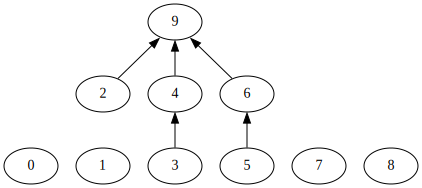

In [23]:
lista = [i for i in range(10)] #Generamos una Lista de 10 enteros
dot = dibujarUFDS(lista)
dot

qu_union(lista, 2, 9)      # Ahora la raiz de 2 es la raiz de 9
qu_union(lista, 3, 4)
qu_union(lista, 4, 9)
qu_union(lista, 5, 6)
qu_union(lista, 5, 3)

print("Lista actualizada: ")  
print("Elemento \tSubconjunto ")
for elemento in range(len(lista)):
    print(f"    {elemento} \t\t     {lista[elemento]}")
dot = dibujarUFDS(lista)
dot

### CICLOS?

In [37]:
from collections import defaultdict
 
# This class represents a undirected graph
# using adjacency list representation
 
 
class GrafoUFDS:
 
    def __init__(self, n):
        self.n = n  # Numero de nodos
        self.grafo = defaultdict(list)  # lista de adyacencia para almacenar el grafo
 
    def agregar_arista(self, a, b):
        self.grafo[a].append(b)
 
    def qu_find(self, padre, nodo):
        if padre[nodo] == nodo:
            return nodo
        if padre[nodo] != nodo:
            return self.qu_find(padre, padre[nodo])
 
    def qu_union(self, padre, raiz_a, raiz_b):
        padre[raiz_a] = raiz_b

    def esGrafoCiclico(self):
        padre = [0]*(self.n)
        
        for nodo in range(self.n):
            padre[nodo] = nodo

        # Si ambos nodos pertenecen al mismo subconjunto, entonces hay un ciclo
        for a in self.grafo:
            for b in self.grafo[a]:
                raiz_a = self.qu_find(padre, a)
                raiz_b = self.qu_find(padre, b)
                
                if raiz_a == raiz_b: return True
                
                self.qu_union(padre, raiz_a, raiz_b)

In [40]:
import graphviz as gv

# Dibujamos el Grafo
def dibujarUFDS(g):
    dot = gv.Graph(comment='Nada')
    n = len(g.grafo)
    
    for i in g.grafo: #Creamos Nodos a partir de los elementos de una Lista
        dot.node(str(i), str(i))
        
    for i in g.grafo: #Creamos Aristas
        for j in g.grafo[i]:
            dot.edge(str(i), str(j))
            
    dot.graph_attr['rankdir'] = 'BT'  #Dibuja el Grafo, como una estructura "Binary Tree"(BT), con una "Raiz"
    return dot

El grafo es ciclico


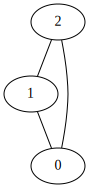

In [43]:
# Create a graph given in the above diagram
g = GrafoUFDS(3)
g.agregar_arista(0, 1)
g.agregar_arista(1, 2)
g.agregar_arista(2, 0)
if g.esGrafoCiclico():
    print("El grafo es ciclico")
else:
    print("El grafo es aciclico")
    
dot = dibujarUFDS(g) 
dot

Lista actualizada: 
Elemento 	Subconjunto 
    a 		     ['b']
    b 		     ['c']
    c 		     ['a']
    f 		     ['a']


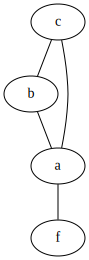

In [50]:
g = GrafoUFDS(4)
g.agregar_arista("a", "b")
g.agregar_arista("b", "c")
g.agregar_arista("c", "a")
g.agregar_arista("f", "a")

print("Lista actualizada: ")  
print("Elemento \tSubconjunto ")
for elemento in g.grafo:
    print(f"    {elemento} \t\t     {g.grafo[elemento]}")
    
dot = dibujarUFDS(g) 
dot

### QUICK UNION PONDERADO

In [11]:
import graphviz as gv

def dibujarUFDS(lista):
    dot = gv.Digraph(comment='Nada')
    n = len(lista)
    
    for i in range(n): #Creamos los nodos
        dot.node(str(i), str(i))
        
    for i in range(n):
        if lista[i] >= 0: #Si su ponderacion >= 0
            dot.edge(str(i), str(lista[i])) #Dibujamos la arista
    dot.graph_attr['rankdir'] = 'BT'
    return dot

In [12]:
#Obtiene la ponderacion del nodo
def find(ponderacion, i):
    while ponderacion[i] >= 0:
        i = ponderacion[i]
    return i

#Examinamos el tamaño de los arboles, y se coloca el arbol más pequeño debajo del arbol mas grande
def union(lista, a, b): 
    pa = find(lista, a)
    pb = find(lista, b)
    print(f"\npa= {pa}, pb= {pb}")
    
    if pa == pb: return
    
    print(f"lista[pa]={lista[pa]}, lista[pb]={lista[pb]}")
    
    if lista[pa] < lista[pb]:
        lista[pa] += lista[pb]
        lista[pb] = pa
        print (f"Lista[pa] < lista[pb], entonces, nuevas ponderaciones para la raiz {pa} (lista[pa]={lista[pa]}, lista[pb]={pa})")
    elif lista[pb] < lista[pa]:
        lista[pb] += lista[pa]
        lista[pa] = pb
        print (f"Lista[pb] < lista[pa], entonces, nuevas ponderaciones para la raiz {pb} (lista[pa]={lista[pb]}, lista[pb]={pb})")
    else:
        lista[pa] += lista[pb] 
        lista[pb] = pa     
        print (f"Igual lista[pa] y lista[pb], entonces, nuevas ponderaciones (lista[pa]={lista[pa]}, lista[pb]={lista[pb]})")

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


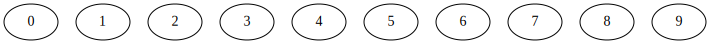

In [21]:
lista = [-1 for i in range(10)]
print(lista) #lista de ponderaciones
dot = dibujarUFDS(lista)
dot

In [22]:
#Unimos 0 y 1, Tienen la misma ponderacion, entonces, la ponderacion de p sera igual a la suma de la ponderacion de p + la ponderacion de q (-1+-1) = -2.  La ponderacion de q es el i de 3 
union(lista, 0, 1)
union(lista, 0, 2)
union(lista, 3, 4)
union(lista, 0, 3)
union(lista, 5, 6)
union(lista, 0, 5)


pa= 0, pb= 1
lista[pa]=-1, lista[pb]=-1
Igual lista[pa] y lista[pb], entonces, nuevas ponderaciones (lista[pa]=-2, lista[pb]=0)

pa= 0, pb= 2
lista[pa]=-2, lista[pb]=-1
Lista[pa] < lista[pb], entonces, nuevas ponderaciones para la raiz 0 (lista[pa]=-3, lista[pb]=0)

pa= 3, pb= 4
lista[pa]=-1, lista[pb]=-1
Igual lista[pa] y lista[pb], entonces, nuevas ponderaciones (lista[pa]=-2, lista[pb]=3)

pa= 0, pb= 3
lista[pa]=-3, lista[pb]=-2
Lista[pa] < lista[pb], entonces, nuevas ponderaciones para la raiz 0 (lista[pa]=-5, lista[pb]=0)

pa= 5, pb= 6
lista[pa]=-1, lista[pb]=-1
Igual lista[pa] y lista[pb], entonces, nuevas ponderaciones (lista[pa]=-2, lista[pb]=5)

pa= 0, pb= 5
lista[pa]=-5, lista[pb]=-2
Lista[pa] < lista[pb], entonces, nuevas ponderaciones para la raiz 0 (lista[pa]=-7, lista[pb]=0)



Lista actualizada: 
Elemento 	Subconjunto 
    0 		     -7
    1 		     0
    2 		     0
    3 		     0
    4 		     3
    5 		     0
    6 		     5
    7 		     -1
    8 		     -1
    9 		     -1


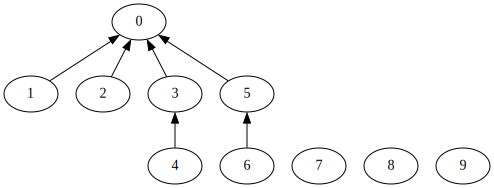

In [23]:
print("\nLista actualizada: ")  
print("Elemento \tSubconjunto ")
for elemento in range(len(lista)):
    print(f"    {elemento} \t\t     {lista[elemento]}")
dot = dibujarUFDS(lista)
dot

### CICLOS

In [3]:
from collections import defaultdict
 
# This class represents a undirected graph
# using adjacency list representation
 
 
class Graph:
 
    def __init__(self, vertices):
        self.V = vertices  # No. of vertices
        self.graph = defaultdict(list)  # default dictionary to store graph
 
    # function to add an edge to graph
    def addEdge(self, u, v):
        self.graph[u].append(v)
 
    # A utility function to find the subset of an element i
    def find_parent(self, parent, i):
        if parent[i] == i:
            return i
        if parent[i] != i:
            return self.find_parent(parent, parent[i])
 
    # A utility function to do union of two subsets
    def union(self, parent, x, y):
        parent[x] = y
 
    # The main function to check whether a given graph
    # contains cycle or not
 
    def isCyclic(self):
 
        # Allocate memory for creating V subsets and
        # Initialize all subsets as single element sets
        parent = [0]*(self.V)
        for i in range(self.V):
            parent[i] = i
 
        # Iterate through all edges of graph, find subset of both
        # vertices of every edge, if both subsets are same, then
        # there is cycle in graph.
        for i in self.graph:
            for j in self.graph[i]:
                x = self.find_parent(parent, i)
                y = self.find_parent(parent, j)
                if x == y:
                    return True
                self.union(parent, x, y)
 
 
# Create a graph given in the above diagram
g = Graph(3)
g.addEdge(0, 1)
g.addEdge(1, 2)
g.addEdge(2, 0)
 
if g.isCyclic():
    print("Graph contains cycle")
else:
    print("Graph does not contain cycle ")

Graph contains cycle


# PRIM

### PRIM - LISTA ADYACENCIA

In [8]:
from collections import defaultdict
import sys

class Heap():
    def __init__(self):
        self.array = []
        self.size = 0
        self.pos = []
 
    def newMinHeapNode(self, v, dist):
        minHeapNode = [v, dist]
        return minHeapNode
 
    def swapMinHeapNode(self, a, b):
        t = self.array[a]
        self.array[a] = self.array[b]
        self.array[b] = t
 
    def minHeapify(self, idx):
        smallest = idx
        left = 2 * idx + 1
        right = 2 * idx + 2
 
        if left < self.size and self.array[left][1] < \
                                self.array[smallest][1]:
            smallest = left
 
        if right < self.size and self.array[right][1] < \
                                self.array[smallest][1]:
            smallest = right
 
        if smallest != idx:
            # Intercambiar posiciones
            self.pos[ self.array[smallest][0] ] = idx
            self.pos[ self.array[idx][0] ] = smallest
 
            # Intercambiar nodos
            self.swapMinHeapNode(smallest, idx)
 
            self.minHeapify(smallest)
 
    def extractMin(self):
 
        # Devuelve NULL si el montón está vacío
        if self.isEmpty() == True:
            return
 
        # Almacenar el nodo raíz
        root = self.array[0]
 
        # Reemplazar el nodo raíz con el último nodo
        lastNode = self.array[self.size - 1]
        self.array[0] = lastNode
 
        # Actualizar posición del último nodo
        self.pos[lastNode[0]] = 0
        self.pos[root[0]] = self.size - 1
 
        # Reduce heap size and heapify root
        self.size -= 1
        self.minHeapify(0)
 
        return root
 
    def isEmpty(self):
        return True if self.size == 0 else False
 
    def decreaseKey(self, v, dist):
        # Obtiene el indice del nodo v en el arreglo del arbol
        i = self.pos[v]
 
        # Obtiene el nodo y actualiza el valor de su distancia
        self.array[i][1] = dist
 
        while i > 0 and self.array[i][1] < \
                    self.array[(i - 1) // 2][1]:
 
            # Swap este nodo con su padre
            self.pos[ self.array[i][0] ] = (i-1)/2
            self.pos[ self.array[(i-1)//2][0] ] = i
            self.swapMinHeapNode(i, (i - 1)//2 )
 
            i = (i - 1) // 2;
 
    def isInMinHeap(self, v):
        if self.pos[v] < self.size:
            return True
        return False
 

In [9]:
# v = nodos del grafo
# u = nodos del arbol de expansion minima

class GrafoPrim():  # Grafo no dirigido, ponderado, aciclico y conexo
    def __init__(self, n):
        self.n = n                          # numero de nodos
        self.grafo = defaultdict(list)      # lista de adyacencia
 
    def agregarArista(self, nodo1, nodo2, pesoArista):
        # Arista Nueva para grafo no dirigido: nodo1->nodo2 y nodo2->nodo1
        nuevoNodo = [nodo2, pesoArista]
        self.grafo[nodo1].insert(0, nuevoNodo)
        
        nuevoNodo = [nodo1, pesoArista]
        self.grafo[nodo2].insert(0, nuevoNodo)
        
    def PrimMST(self):
        n = self.n
        costo = []      # se usa para elegir la arista de menor peso
        padre = []      # almacena el arbol de expansion minima 
 
        # Crear el arbol de expansion minima(heap) con todos los nodos del grafo(v)
        heap = Heap()
        
        for v in range(n):
            padre.append(-1)
            costo.append(1000000)
            heap.array.append( heap.newMinHeapNode(v, costo[v]) )
            heap.pos.append(v)

        # Extraer el primer nodo
        heap.pos[0] = 0
        costo[0] = 0
        heap.decreaseKey(0, costo[0])
 
        # Hacer que el tamaño del arbol sea el mismo que el del grafo
        heap.size = n;

        # ALGORITMO PRIM
        while heap.isEmpty() == False:
 
            # Extraer el nodo con menor distancia
            nuevoHeapNodo = heap.extractMin()
            u = nuevoHeapNodo[0]
 
            # Recorrer todos sus nodos adyacentes y actualizar su costo (key[])
            # aristas[0] = el nodo adyacente
            # aristas[1] = el costo de la arista
            for aristas in self.grafo[u]:
                v = aristas[0]
 
                if heap.isInMinHeap(v) and aristas[1] < costo[v]:
                    costo[v] = aristas[1]
                    padre[v] = u
 
                    # Actualizar el costo del nodo en el arbol
                    heap.decreaseKey(v, costo[v])
                    
                    
        # IMPRIMIR MST - PRIM
        costo_total = 0
        print("Arista \tCosto")
        for i in range(1, n):
            costo_total += costo[i]
            print(f"{padre[i]} - {i} \t {costo[i]}")
            
        print(f"\nCosto total: {costo_total}")

In [10]:
grafo = GrafoPrim(9)
grafo.agregarArista(0, 1, 4)
grafo.agregarArista(0, 7, 8)
grafo.agregarArista(1, 2, 8)
grafo.agregarArista(1, 7, 11)
grafo.agregarArista(2, 3, 7)
grafo.agregarArista(2, 8, 2)
grafo.agregarArista(2, 5, 4)
grafo.agregarArista(3, 4, 9)
grafo.agregarArista(3, 5, 14)
grafo.agregarArista(4, 5, 10)
grafo.agregarArista(5, 6, 2)
grafo.agregarArista(6, 7, 1)
grafo.agregarArista(6, 8, 6)
grafo.agregarArista(7, 8, 7)

print("\n*Grafo:")
for nodo in grafo.grafo:
    print(f"{nodo}: {grafo.grafo[nodo]}")
    
print("\n*Arbol de expansion minima:")
grafo.PrimMST()


*Grafo:
0: [[7, 8], [1, 4]]
1: [[7, 11], [2, 8], [0, 4]]
7: [[8, 7], [6, 1], [1, 11], [0, 8]]
2: [[5, 4], [8, 2], [3, 7], [1, 8]]
3: [[5, 14], [4, 9], [2, 7]]
8: [[7, 7], [6, 6], [2, 2]]
5: [[6, 2], [4, 10], [3, 14], [2, 4]]
4: [[5, 10], [3, 9]]
6: [[8, 6], [7, 1], [5, 2]]

*Arbol de expansion minima:
Arista 	Costo
0 - 1 	 4
5 - 2 	 4
2 - 3 	 7
3 - 4 	 9
6 - 5 	 2
7 - 6 	 1
0 - 7 	 8
2 - 8 	 2

Costo total: 37


In [16]:
%%file archivoLA.txt
9 14
0 1 4
0 7 8
1 2 8
1 7 11
2 3 7
2 8 2
2 5 4
3 4 9
3 5 14
4 5 10
5 6 2
6 7 1
6 8 6
7 8 7

Writing archivoLA.txt


In [21]:
## LEER EL ARCHIVO Y PASARLO A LISTA DE ADYACENCIA

from collections import defaultdict
import math

with open("archivoLA.txt") as fileListaAdyacencia:
  #PRIMERA LINEA
  datos = [int(x) for x in fileListaAdyacencia.readline().split()]
  
  n = datos[0]
  a = datos[1]
  
  print(f"Cantidad de nodos: {n} \nCantidad de aristas: {a}")
  
  grafo = GrafoPrim(n)
  
  #A PARTIR DE LA SEGUNDA LINEA
  for linea in fileListaAdyacencia:
    lista = [int(x) for x in linea.split()]
    
    for i in range(0, len(lista), 3):
      if(lista[i+2]!=0):
        grafo.agregarArista(lista[i], lista[i+1], lista[i+2])
  
  #COMPLETAR EL GRAFO CON LOS NODOS FALTANTES
  for nodo in range(0, n):
    if(nodo not in grafo.grafo):
      grafo.grafo[nodo]=[]
  
### ----------------------------------------
print("\n*Grafo:")
for nodo in grafo.grafo:
    print(f"{nodo}: {grafo.grafo[nodo]}")
    
print("\n*Arbol de expansion minima:")
grafo.PrimMST()

Cantidad de nodos: 9 
Cantidad de aristas: 14

*Grafo:
0: [[7, 8], [1, 4]]
1: [[7, 11], [2, 8], [0, 4]]
7: [[8, 7], [6, 1], [1, 11], [0, 8]]
2: [[5, 4], [8, 2], [3, 7], [1, 8]]
3: [[5, 14], [4, 9], [2, 7]]
8: [[7, 7], [6, 6], [2, 2]]
5: [[6, 2], [4, 10], [3, 14], [2, 4]]
4: [[5, 10], [3, 9]]
6: [[8, 6], [7, 1], [5, 2]]

*Arbol de expansion minima:
Arista 	Costo
0 - 1 	 4
5 - 2 	 4
2 - 3 	 7
3 - 4 	 9
6 - 5 	 2
7 - 6 	 1
0 - 7 	 8
2 - 8 	 2

Costo total: 37


### PRIM - MATRIX

In [4]:
import sys
class GrafoPrim():
    def __init__(self, n):
        self.n = n
        self.grafo = [[0 for columna in range(n)]
                      for fila in range(n)]

    def printMST(self, padre):
        costo_total = 0
        resultado_aristas = []
        
        print("Arista \tCosto")
        for i in range(1, self.n):
            costo_total += self.grafo[i][padre[i]]
            print(f"{padre[i]} - {i} \t  {self.grafo[i][padre[i]]}")
            resultado_aristas.append((padre[i], i))
            
        print(f"\nCosto total: {costo_total}")
        
        return resultado_aristas
        
    def obtenerNodo_MinCosto(self, costo, mst):
        minCosto = 1000000
 
        for v in range(self.n):
            if costo[v] < minCosto and mst[v] == False:
                minCosto = costo[v]
                min_nodo = v
 
        return min_nodo
 
    # Algoritmo de Prim
    def primMST(self):
        costo = [sys.maxsize] * self.n      # se usa para elegir la arista de menor peso
        parent = [None] * self.n            # almacena el arbol de expansion minima
        
        # Extraer el primer nodo
        costo[0] = 0
        mst = [False] * self.n
        parent[0] = -1
 
        for nodo in range(self.n):
            
            # Escoger el vertice de menor distancia
            u = self.obtenerNodo_MinCosto(costo, mst)
            mst[u] = True      

            # Actualizar el costo de los nodos adyacentes del nodo escogido
            for v in range(self.n):
                # grafo[u][v]: si existe la arista, su costo debe ser >0
                # mst[v] es False si aun no ha sido incluido en el arbol de expansion minima
                if self.grafo[u][v] > 0 and mst[v] == False and costo[v] > self.grafo[u][v]:
                    costo[v] = self.grafo[u][v]
                    parent[v] = u
 
        return self.printMST(parent)

In [20]:
grafo = GrafoPrim(5)
grafo.grafo = [ [0, 2, 0, 6, 0],
                [2, 0, 3, 8, 5],
                [0, 3, 0, 0, 7],
                [6, 8, 0, 0, 9],
                [0, 5, 7, 9, 0]]
 
resultado_aristas=grafo.primMST()
print("Aristas del arbol de expansion minima:", resultado_aristas)

Arista 	Costo
0 - 1 	  2
1 - 2 	  3
0 - 3 	  6
1 - 4 	  5

Costo total: 16
Aristas del arbol de expansion minima: [(0, 1), (1, 2), (0, 3), (1, 4)]


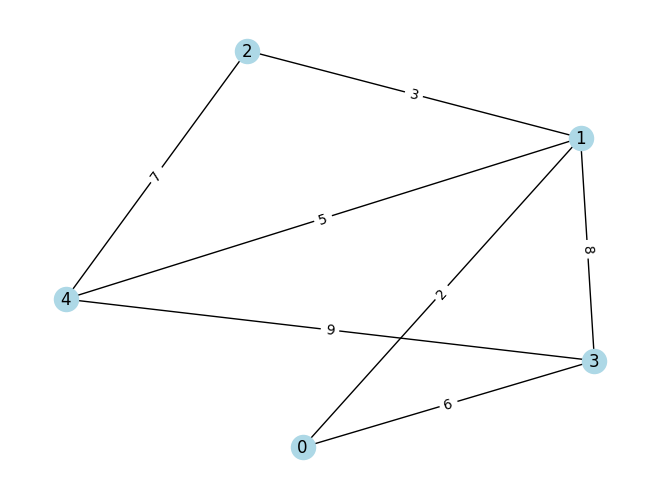

In [28]:
# GRAFO INICIAL

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(range(len(grafo.grafo)))
pos = nx.layout.spring_layout(G)

for i in range(len(grafo.grafo)):
  for j in range(len(grafo.grafo[i])):
    if grafo.grafo[i][j] > 0:
      G.add_edge(i,j, capacity=grafo.grafo[i][j])
      
labels = nx.get_edge_attributes(G, 'capacity')
nx.draw(G,pos, with_labels=True, node_color='LightBlue')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.show()

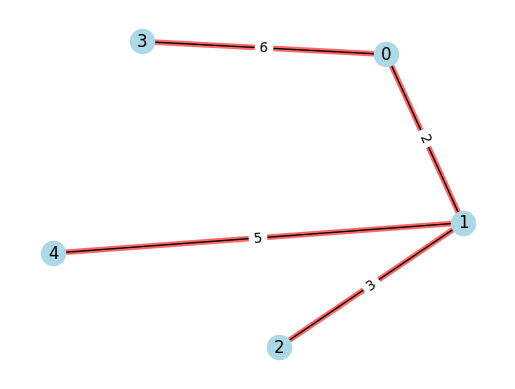

In [42]:
# ARBOL DE EXPANSION MINIMA

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(range(len(grafo.grafo)))
pos = nx.layout.spring_layout(G)

for i in range(len(grafo.grafo)):
  for j in range(len(grafo.grafo[i])):
    if grafo.grafo[i][j] > 0 and (i,j) in resultado_aristas:
      G.add_edge(i,j, capacity=grafo.grafo[i][j])


for arista in resultado_aristas:
         if (arista[0], arista[1]) in G.edges():
             nx.draw_networkx_edges(G, pos, edgelist = [(arista[0], arista[1])],
                                    width = 4.0, alpha = 0.6, edge_color = 'r')

labels = nx.get_edge_attributes(G, 'capacity')
nx.draw(G,pos, with_labels=True, node_color='LightBlue')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.show()

# KRUSKAL

In [44]:
# CREAR GRAFO PONDERADO ------------------------------
class GrafoKruskal:
    def __init__(self, nodos):
        self.lstNodos = nodos
        self.grafo = []

    def agregar_arista(self, nodo1, nodo2, pesoArista):
        self.grafo.append([nodo1, nodo2, pesoArista])



# FUNCIONES DE BUSQUEDA -------------------------------

# Obtiene la raiz del nodo
def find(padre, i):
    if padre[i] == i:
        return i
        
    return find(padre, padre[i])

# Examinamos el tamaño de los arboles, y se coloca el arbol más pequeño debajo del arbol mas grande
def union(padre, rank, x, y):
    xRaiz = find(padre, x)
    yRaiz = find(padre, y)
        
    if rank[xRaiz] < rank[yRaiz]:
        padre[xRaiz] = yRaiz
    elif rank[xRaiz] > rank[yRaiz]:
        padre[yRaiz] = xRaiz
    else:
        padre[yRaiz] = xRaiz
        rank[yRaiz] += 1


# ALGORITMO DE KRUSKAL  ----------------------------
    
def kruskal_algo(grafoP):
    resultado = [] 
        
    #"i": indice usado para las aristas ordenadas.
    #"e": indice usado para resultado[]
    i, e, pesoTotalGrafo = 0, 0, 0  
        
    #Ordena el Grafo por el peso de las aristas, de menor a mayor
    grafoP.grafo = sorted(grafoP.grafo, key=lambda item: item[2]) 
        
    #Inicializar subconjuntos relacionados a los nodos
    padre = []
    rank = []
        
    for nodo in range(grafoP.lstNodos):
        padre.append(nodo) 
        rank.append(0)
        
    #Mientras el número de aristas a tomar es menor que lstNodos -1
    while e < grafoP.lstNodos - 1: 
            
        #Elegimos la arista de peso menor y se incrementa el índice para la próxima iteración
        nodo1, nodo2, pesoArista = grafoP.grafo[i]
        i = i + 1
            
        #Verificar si la arista no genera un ciclo
        #Si es asi, se incluye en el resultado y se incrementa el índice del resultado para la siguiente arista           
        x = find(padre, nodo1)
        y = find(padre, nodo2)
            
        if x != y:
            e = e + 1
            resultado.append([nodo1, nodo2, pesoArista])
            union(padre, rank, x, y)
        
    # Imprimir respuesta
    resultado_aristas = []
    print("Arista \tPeso")
    for nodo1, nodo2, pesoArista in resultado:
        pesoTotalGrafo = pesoTotalGrafo + pesoArista
        print(f"{nodo1} - {nodo2} \t {pesoArista}")

    print("\nCosto total del grafo: ", pesoTotalGrafo)

    return resultado

In [54]:
g = GrafoKruskal(6)
g.agregar_arista(0, 1, 4)
g.agregar_arista(0, 2, 4)
g.agregar_arista(1, 2, 2)
g.agregar_arista(1, 0, 4)
g.agregar_arista(2, 0, 4)
g.agregar_arista(2, 1, 2)
g.agregar_arista(2, 3, 3)
g.agregar_arista(2, 5, 2)
g.agregar_arista(2, 4, 4)
g.agregar_arista(3, 2, 3)
g.agregar_arista(3, 4, 3)
g.agregar_arista(4, 2, 4)
g.agregar_arista(4, 3, 3)
g.agregar_arista(5, 2, 2)
g.agregar_arista(5, 4, 3)

### ----------------------------------------
print("\n*Grafo:")
for arista in g.grafo:
    print(f"{arista}")    
#Algoritmo de Kruskal
print("\n*Arbol de expansion minima:")
resultado = kruskal_algo(g)
print("Arreglo: ", resultado)


*Grafo:
[0, 1, 4]
[0, 2, 4]
[1, 2, 2]
[1, 0, 4]
[2, 0, 4]
[2, 1, 2]
[2, 3, 3]
[2, 5, 2]
[2, 4, 4]
[3, 2, 3]
[3, 4, 3]
[4, 2, 4]
[4, 3, 3]
[5, 2, 2]
[5, 4, 3]

*Arbol de expansion minima:
Arista 	Peso
1 - 2 	 2
2 - 5 	 2
2 - 3 	 3
3 - 4 	 3
0 - 1 	 4

Costo total del grafo:  14
Arreglo:  [[1, 2, 2], [2, 5, 2], [2, 3, 3], [3, 4, 3], [0, 1, 4]]


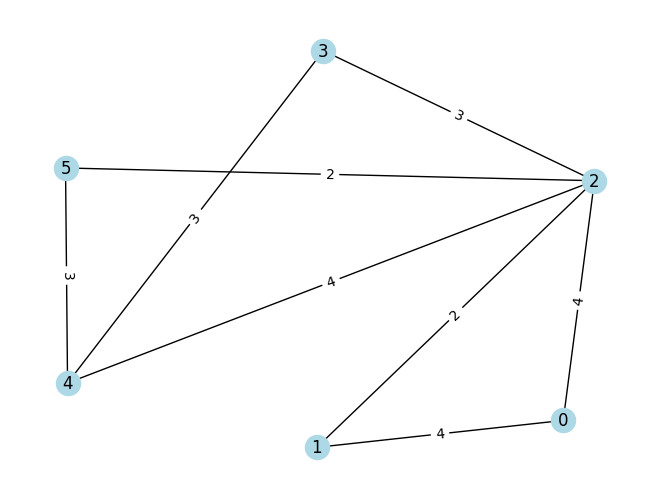

In [52]:
# GRAFO INICIAL

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(range(6))
pos = nx.layout.spring_layout(G)

for arista in g.grafo:
  G.add_edge(arista[0], arista[1], capacity=arista[2])
      
labels = nx.get_edge_attributes(G, 'capacity')
nx.draw(G,pos, with_labels=True, node_color='LightBlue')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.show()

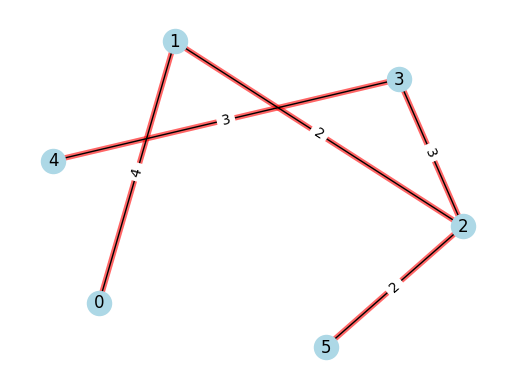

In [60]:
# ARBOL DE EXPANSION MINIMA

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(range(6))
pos = nx.layout.spring_layout(G)

for arista in g.grafo:
  if (arista) in resultado:
    G.add_edge(arista[0], arista[1], capacity=arista[2])
  
for arista in resultado:
         if (arista[0], arista[1]) in G.edges():
             nx.draw_networkx_edges(G, pos, edgelist = [(arista[0], arista[1])],
                                    width = 4.0, alpha = 0.6, edge_color = 'r')

labels = nx.get_edge_attributes(G, 'capacity')
nx.draw(G,pos, with_labels=True, node_color='LightBlue')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.show()

In [31]:
%%file archivoLA.txt
6 15
0 1 4
0 2 4
1 2 2
1 0 4
2 0 4
2 1 2
2 3 3
2 5 3
2 4 4
3 2 3
3 4 3
4 2 4
4 3 3
5 2 2
5 4 3

Writing archivoLA.txt


In [56]:
## LEER EL ARCHIVO Y PASARLO A LISTA DE ADYACENCIA

from collections import defaultdict
import math

with open("archivoLA.txt") as fileListaAdyacencia:
  #PRIMERA LINEA
  datos = [int(x) for x in fileListaAdyacencia.readline().split()]
  
  n = datos[0]
  a = datos[1]
  
  print(f"Cantidad de nodos: {n} \nCantidad de aristas: {a}")
  
  g = GrafoKruskal(n)
  
  #A PARTIR DE LA SEGUNDA LINEA
  for linea in fileListaAdyacencia:
    lista = [int(x) for x in linea.split()]
    
    for i in range(0, len(lista), 3):
      if(lista[i+2]!=0):
        g.agregar_arista(lista[i], lista[i+1], lista[i+2])

### ----------------------------------------
print("\n*Grafo:")
for arista in g.grafo:
    print(f"{arista}")    
    
print("\n*Arbol de expansion minima:")
resultado = kruskal_algo(g)

Cantidad de nodos: 6 
Cantidad de aristas: 15

*Grafo:
[0, 1, 4]
[0, 2, 4]
[1, 2, 2]
[1, 0, 4]
[2, 0, 4]
[2, 1, 2]
[2, 3, 3]
[2, 5, 3]
[2, 4, 4]
[3, 2, 3]
[3, 4, 3]
[4, 2, 4]
[4, 3, 3]
[5, 2, 2]
[5, 4, 3]

*Arbol de expansion minima:
Arista 	Peso
1 - 2 	 2
5 - 2 	 2
2 - 3 	 3
3 - 4 	 3
0 - 1 	 4

Costo total del grafo:  14


# FLUJO MAXIMO EN REDES

In [109]:
def BFS(grafo, nodoOrigen, nodoDestino, padre):
    visitados = [False] * len(grafo)
    cola = []
    
    cola.append(nodoOrigen)
    visitados[nodoOrigen] = True
    
    # Encontrar un camino del grafo, cuya arista tenga capacidad y aun no haya sido agregada al camino
    while cola:
        nodo = cola.pop(0)
        
        for vecino in range(len(grafo[nodo])):
            if visitados[vecino] is False and grafo[nodo][vecino] > 0:
                cola.append(vecino)
                visitados[vecino] = True
                padre[vecino] = nodo
    
    if visitados[nodoDestino]: return True
    else: return False
 
 
def FordFulkerson(grafo, nodoOrigen, nodoDestino, grafoInicial):
    padre = [-1] * (len(grafo))
    flujo_maximo = 0
    
    while BFS(grafo, nodoOrigen, nodoDestino, padre):
        camino_flujo = float("Inf")

        # En el camino seleccionado, escoger la arista con flujo/capacidad menor
        # Significa que este flujo si va a poder ser transportado desde el nodo origen al nodo destino
        destino = nodoDestino
        
        print(f"\n\nCamino Seleccionado: {destino}", end='-')
        while destino != nodoOrigen:
            camino_flujo = min(camino_flujo, grafo[padre[destino]][destino])
            destino = padre[destino]
            print(destino, end='-')
 
        # Actualizar el flujo maximo
        flujo_maximo += camino_flujo
        print(f"\nFlujo a transportar: {camino_flujo}, entonces el flujo maximo: {flujo_maximo}")
        
        # Actualiza en el grafo, el flujo transportado en todas las aristas del camino seleccionado
        nodo2 = nodoDestino

        print(f"Camino Actualizado:", end=' ')
        while nodo2 != nodoOrigen:
            nodo1 = padre[nodo2]
            grafo[nodo1][nodo2] -= camino_flujo     # Almacena el flujo que aun se puede transportar porque todavia no alcanza la capacidad -> CAPACIDAD - FLUJO ACTUAL
            grafo[nodo2][nodo1] += camino_flujo     # Almacena el flujo actual -> FLUJO ACTUAL
            print(f"{nodo1}-{nodo2}: {grafo[nodo2][nodo1]}/{grafoInicial[nodo1][nodo2]}", end=', ')
            
            nodo2 = padre[nodo2]
    
    
    print("\n\nGRAFO FINAL [Flujo transportado/Capacidad]")
    conti = 0;
    for i in grafoInicial:
        contj=0
        for j in i:
            if(j!=0):
                print(f"{conti} - {contj}: {grafo[contj][conti]}/{j}")
            contj+=1
        conti+=1
        
    
    return flujo_maximo

In [110]:
grafo = [
    [0, 8, 9, 5, 0, 0, 0],
    [0, 0, 0, 0, 6, 0, 0],
    [0, 0, 0, 7, 0, 5, 0],
    [0, 4, 0, 0, 2, 6, 0],
    [0, 0, 0, 0, 0, 4, 11],
    [0, 0, 0, 0, 0, 0, 13],
    [0, 0, 0, 0, 0, 0, 0],
]

grafoInicial = [
    [0, 8, 9, 5, 0, 0, 0],
    [0, 0, 0, 0, 6, 0, 0],
    [0, 0, 0, 7, 0, 5, 0],
    [0, 4, 0, 0, 2, 6, 0],
    [0, 0, 0, 0, 0, 4, 11],
    [0, 0, 0, 0, 0, 0, 13],
    [0, 0, 0, 0, 0, 0, 0],
]

nodoOrigen, nodoDestino = 0, 6

print("GRAFO INICIAL")
## ENTENDIENDO LOS DATOS DE LA MATRIZ
conti = 0;
for i in grafo:
    contj=0
    for j in i:
        if(j!=0):
            print(f"{conti} - {contj}: {j}")
        contj+=1
    conti+=1
    
print(f"\nFlujo maximo entre: {nodoOrigen} y {nodoDestino} es {FordFulkerson(grafo, nodoOrigen, nodoDestino, grafoInicial)}")

GRAFO INICIAL
0 - 1: 8
0 - 2: 9
0 - 3: 5
1 - 4: 6
2 - 3: 7
2 - 5: 5
3 - 1: 4
3 - 4: 2
3 - 5: 6
4 - 5: 4
4 - 6: 11
5 - 6: 13


Camino Seleccionado: 6-4-1-0-
Flujo a transportar: 6, entonces el flujo maximo: 6
Camino Actualizado: 4-6: 6/11, 1-4: 6/6, 0-1: 6/8, 

Camino Seleccionado: 6-5-2-0-
Flujo a transportar: 5, entonces el flujo maximo: 11
Camino Actualizado: 5-6: 5/13, 2-5: 5/5, 0-2: 5/9, 

Camino Seleccionado: 6-4-3-0-
Flujo a transportar: 2, entonces el flujo maximo: 13
Camino Actualizado: 4-6: 8/11, 3-4: 2/2, 0-3: 2/5, 

Camino Seleccionado: 6-5-3-0-
Flujo a transportar: 3, entonces el flujo maximo: 16
Camino Actualizado: 5-6: 8/13, 3-5: 3/6, 0-3: 5/5, 

Camino Seleccionado: 6-5-3-2-0-
Flujo a transportar: 3, entonces el flujo maximo: 19
Camino Actualizado: 5-6: 11/13, 3-5: 6/6, 2-3: 3/7, 0-2: 8/9, 

GRAFO FINAL [Flujo transportado/Capacidad]
0 - 1: 6/8
0 - 2: 8/9
0 - 3: 5/5
1 - 4: 6/6
2 - 3: 3/7
2 - 5: 5/5
3 - 1: 0/4
3 - 4: 2/2
3 - 5: 6/6
4 - 5: 0/4
4 - 6: 8/11
5 - 6: 11/13

Flu

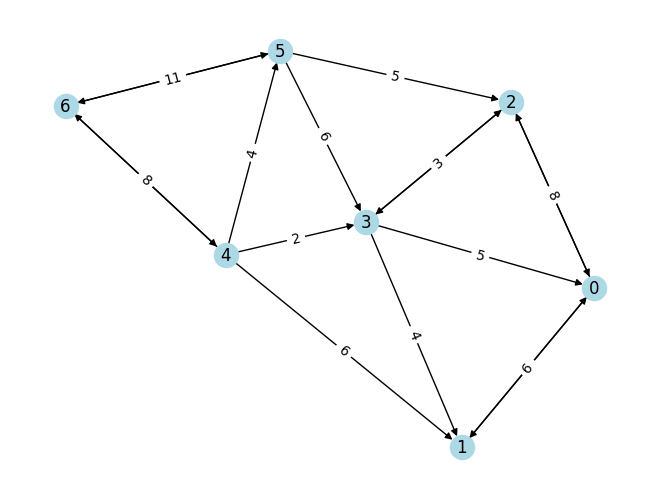

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_nodes_from(range(len(grafo)))

for i in range(len(grafo)):
  for j in range(len(grafo[i])):
    if grafo[i][j] > 0:
      G.add_edge(i,j, capacity=grafo[i][j])
      
pos = nx.layout.spring_layout(G)
labels = nx.get_edge_attributes(G, 'capacity')
nx.draw(G,pos, with_labels=True, node_color='LightBlue')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

In [25]:
%%file archivoMatriz.txt
0 8 9 5 0 0 0
0 0 0 0 6 0 0
0 0 0 7 0 5 0
0 4 0 0 2 6 0
0 0 0 0 0 4 11
0 0 0 0 0 0 13
0 0 0 0 0 0 0

Writing archivoMatriz.txt


In [29]:
import numpy as np
print("GRAFO INICIAL")
## MATRIZ
m = np.loadtxt("archivoMatriz.txt", dtype = int)
print("\n", m, "\n")

## ENTENDIENDO LOS DATOS DE LA MATRIZ
conti = 0;
for i in m:
    contj=0
    for j in i:
        if(j!=0):
            print(f"{conti} - {contj}: {j}")
        contj+=1
    conti+=1

GRAFO INICIAL

 [[ 0  8  9  5  0  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  7  0  5  0]
 [ 0  4  0  0  2  6  0]
 [ 0  0  0  0  0  4 11]
 [ 0  0  0  0  0  0 13]
 [ 0  0  0  0  0  0  0]] 

0 - 1: 8
0 - 2: 9
0 - 3: 5
1 - 4: 6
2 - 3: 7
2 - 5: 5
3 - 1: 4
3 - 4: 2
3 - 5: 6
4 - 5: 4
4 - 6: 11
5 - 6: 13


In [69]:
nodoOrigen, nodoDestino = 0, 6

print(f"Flujo maximo entre: {nodoOrigen} y {nodoDestino} es {FordFulkerson(m, nodoOrigen, nodoDestino)}")

Flujo maximo entre: 0 y 6 es 19
